
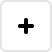
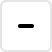
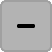
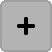
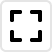
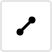
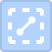
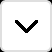
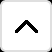
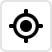

In [1]:
from lets_plot import *

LetsPlot.setup_html()

In [2]:
import pandas as pd

mpg = pd.read_csv ("https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/data/mpg.csv")
mpg.head(3)

,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact


#### Default Presentation

In [3]:
p = ggplot(mpg, aes(x="displ", y="hwy")) + geom_point(aes(color="cty", shape="drv"), size=5)
p

#### Multiline Legend

In [4]:
scale_labels = scale_color_continuous(
                    name="City mileage",
                    breaks=[30,20,10],
                    labels=["30 (mpg)","2\n0\n(mpg)","10\n(mpg)"]
               ) + \
               scale_shape(
                    name="Drive type",
                    limits=["f", "r", "4"],
                    labels=["Front-wheel\ndrive", "Rear \n wheel \n drive", "4 wheel drive"])
p + scale_labels 

#### Change Legend Direction

In [5]:
p + scale_labels + theme(legend_position="bottom")

#### No Overlapping

In [6]:
p + scale_color_continuous(
        breaks=[35,30,25,20,15,10],
        labels=["35\n(mpg)","30\n(mpg)","25\n(mpg)","20\n(mpg)","15\n(mpg)","10\n(mpg)"])

In [7]:
p + scale_color_continuous(
        breaks=[35,30,25,20,15,10],
        labels=["35\n(mpg)","30\n(mpg)","25\n(mpg)","20\n(mpg)","15\n(mpg)","10\n(mpg)"]
) + theme(legend_position="bottom")

In [8]:
import numpy as np
from scipy.stats import multivariate_normal

delta = 0.5
center_x = - 100
center_y = 35
x = np.arange(-5.0, 5.0, delta)
y = np.arange(-5.0, 5.0, delta)
X, Y = np.meshgrid(x, y)

mu = np.array([1, 0])
sigma = np.diag([1, 4])
mu1 = np.array([0, 0])
sigma1 = np.diag([4, 1])

Z = multivariate_normal.pdf(np.dstack((X, Y)), mean=mu, cov=sigma)
Z = Z - multivariate_normal.pdf(np.dstack((X, Y)), mean=mu1, cov=sigma1)

x = X.reshape(-1) + center_x
y = Y.reshape(-1) + center_y
z = Z.reshape(-1)
dat = dict(x=x, y=y, z=z)

ggplot(dat, aes('x', 'y')) +  geom_tile(aes(fill='z'), width=.5, height=.5) +\
    geom_contour(aes(z='z'), alpha=0.5) +\
    scale_fill_gradient('blue', 'red') + \
    theme(legend_position='top')